In [12]:
#pip install pandas numpy yahoo_oauth seaborn matplotlib

In [1]:
import pandas as pd
import numpy as np
import json
import sys
from yahoo_oauth import OAuth2
from json import dumps
from pandas.io.json import _normalize
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#import matplotlib.cbook
#arnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
#%matplotlib inline

In [2]:
# import dictionary of Yahoo Manager Names to Real Life Nicknames
with open('../teams/team_mapping_initials.txt', 'r') as f:
    dict_init = dict(eval(f.read()))
with open('../teams/team_mapping_full.txt', 'r') as f:
    dict_full = dict(eval(f.read()))
    
#Need to create mapping between Real Name and Initials, in form of new dictionary
dict_full_init = {}
for name in dict_full:
    dict_full_init[dict_full[name]] = dict_init[name]
    
# names--> manager initials
names = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12']

weeks = ['wk_1', 'wk_2', 'wk_3', 'wk_4', 'wk_5', 'wk_6', 'wk_7', 'wk_8',
         'wk_9', 'wk_10', 'wk_11', 'wk_12', 'wk_13', 'wk_14', 'wk_15', 'wk_16']

In [3]:
week = 1
df_total_scores = pd.DataFrame()
df_total_scores = pd.DataFrame(columns=weeks, index = names)
for week in range(1,17):
    df_scores = pd.read_csv('../weekly_scores/wk_'+str(week)+'_scores.csv', index_col='Unnamed: 0')
    df_scores = df_scores.rename(columns=dict_full_init)
    
    week_id = 'wk_' + str(week)
    #df_total_scores[week_id] = pd.Series()
    positions = ['QB', 'WR1', 'WR2', 'WR3', 'RB1', 'RB2', 'TE', 'W/R/T','K', 'DEF']
    for manager in df_scores:
        df_total_scores.loc[manager, week_id] = df_scores.loc[positions, manager].sum()


FileNotFoundError: [Errno 2] No such file or directory: '../weekly_scores/wk_1_scores.csv'

In [4]:
#df_total_scores = df_total_scores.reset_index()
df_total_scores.replace(0, np.nan, inplace=True)
df_total_scores

,wk_1,wk_2,wk_3,wk_4,wk_5,wk_6,wk_7,wk_8,wk_9,wk_10,wk_11,wk_12,wk_13,wk_14,wk_15,wk_16
M1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

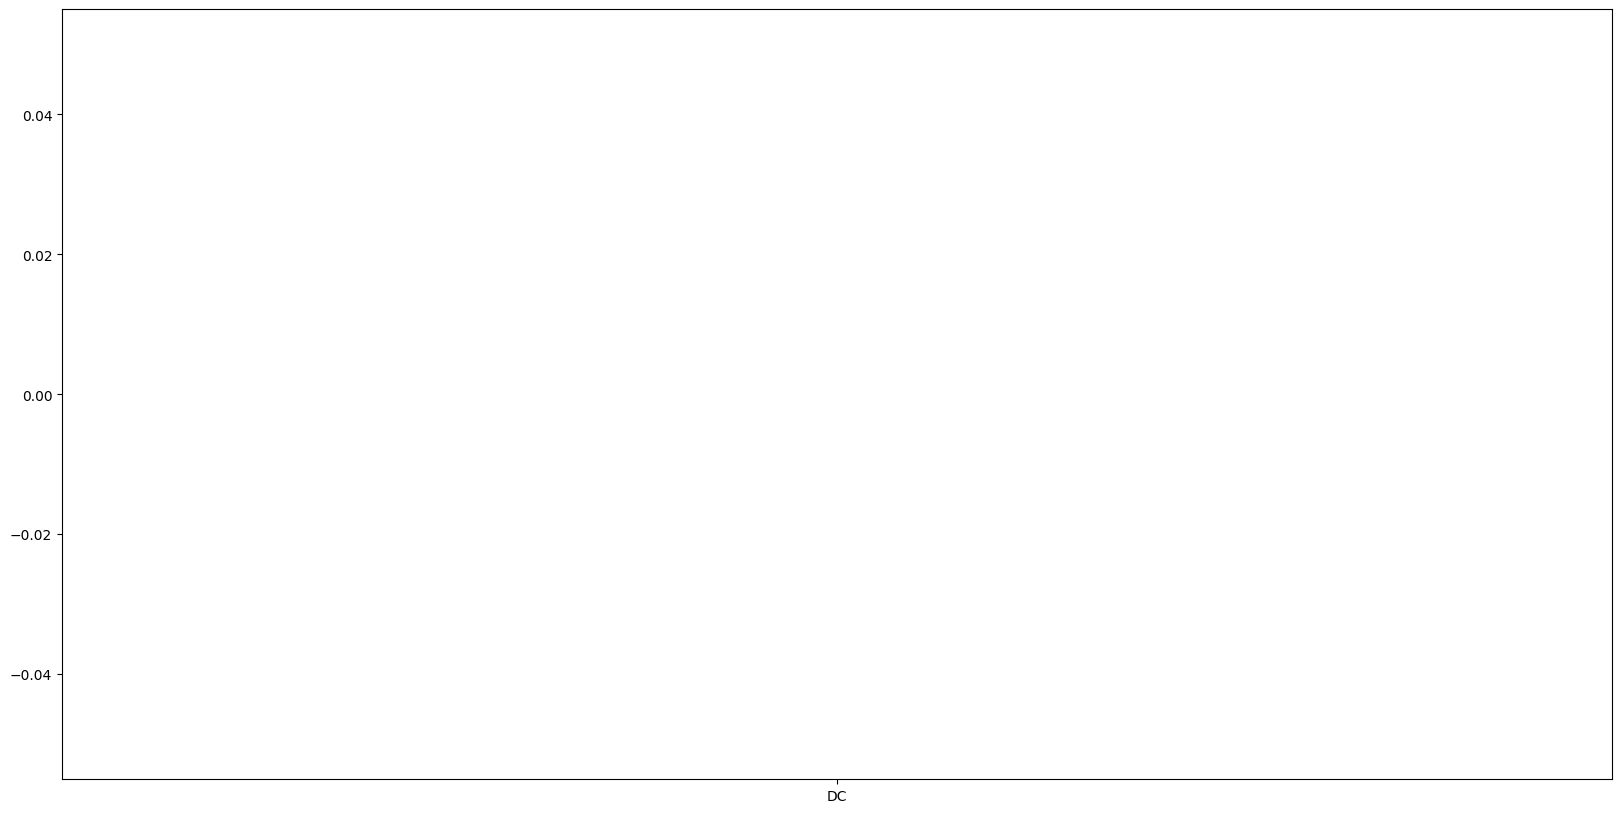

In [5]:
order = ['DC', 'ES', 'KP',
         'ZB', 'EK', 'BB',
         'MD', 'AS', 'DF',
         'SH', 'TB', 'BZ']
###################
week = 3
##################

fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.boxplot(data=data, 
                    order=order,
                    fliersize=10
                   )
ax.set_title("Scoring Distribution Per Week: Weeks 1-%s" % (week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.show(fig)


C:\Users\aidan\AppData\Local\Temp\ipykernel_21672\4156396776.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=data,


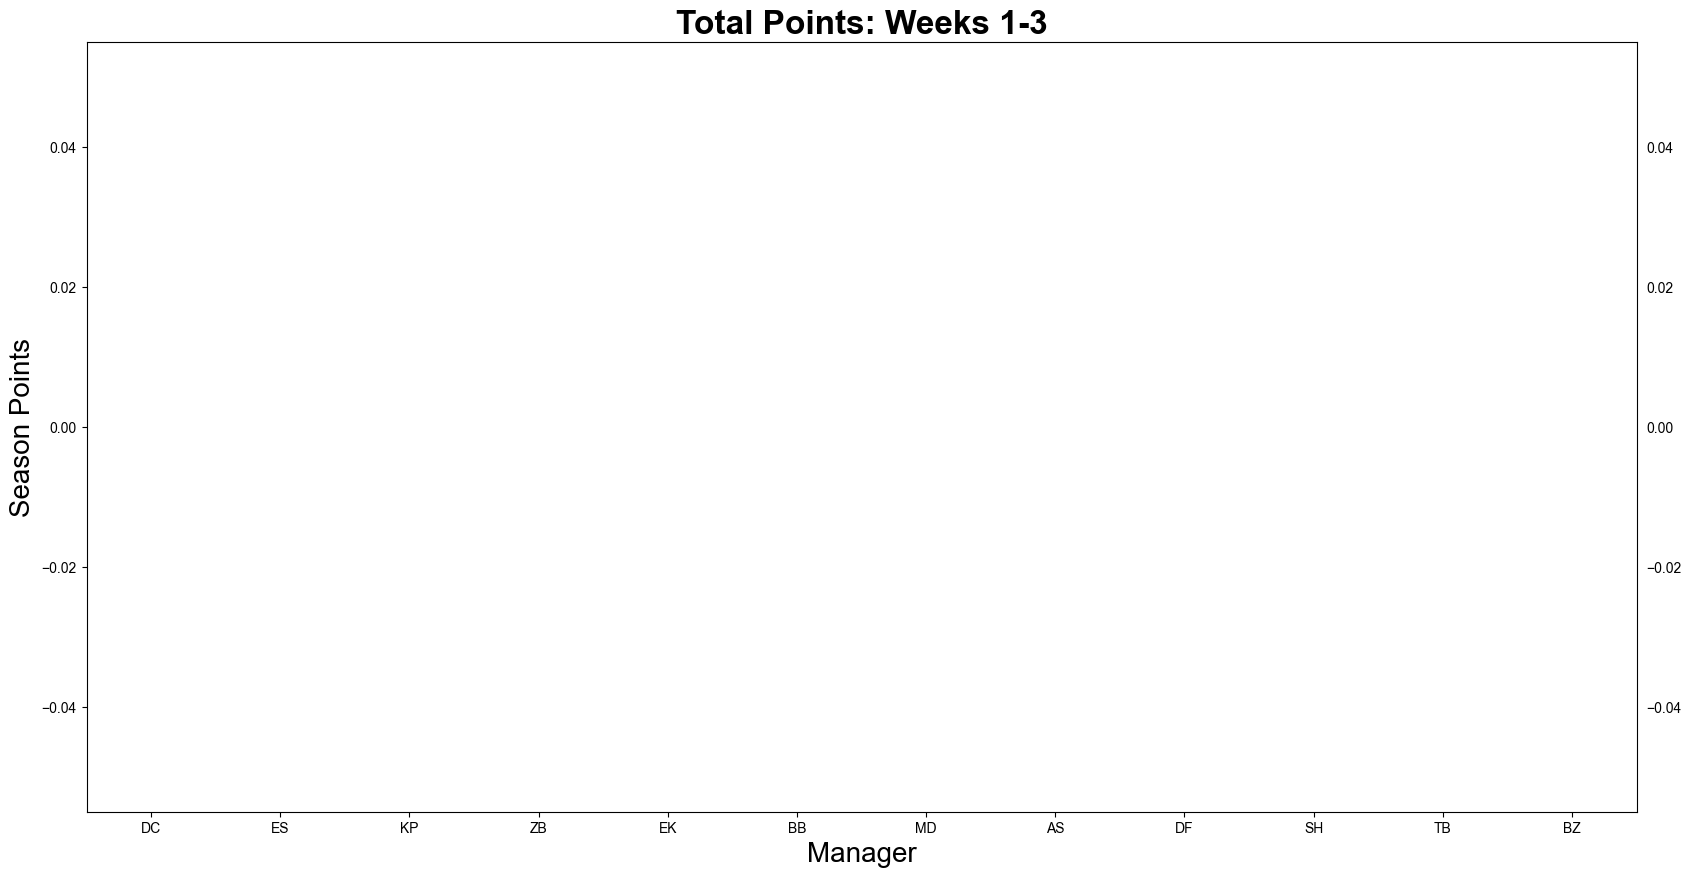

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.barplot(data=data, 
                    order=order,
                    estimator=sum,
                    ci=None
                   )
ax.set_title("Total Points: Weeks 1-%s" %(week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Season Points", fontsize=20)
plt.show(fig)

C:\Users\aidan\AppData\Local\Temp\ipykernel_22744\380012502.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(data=data,


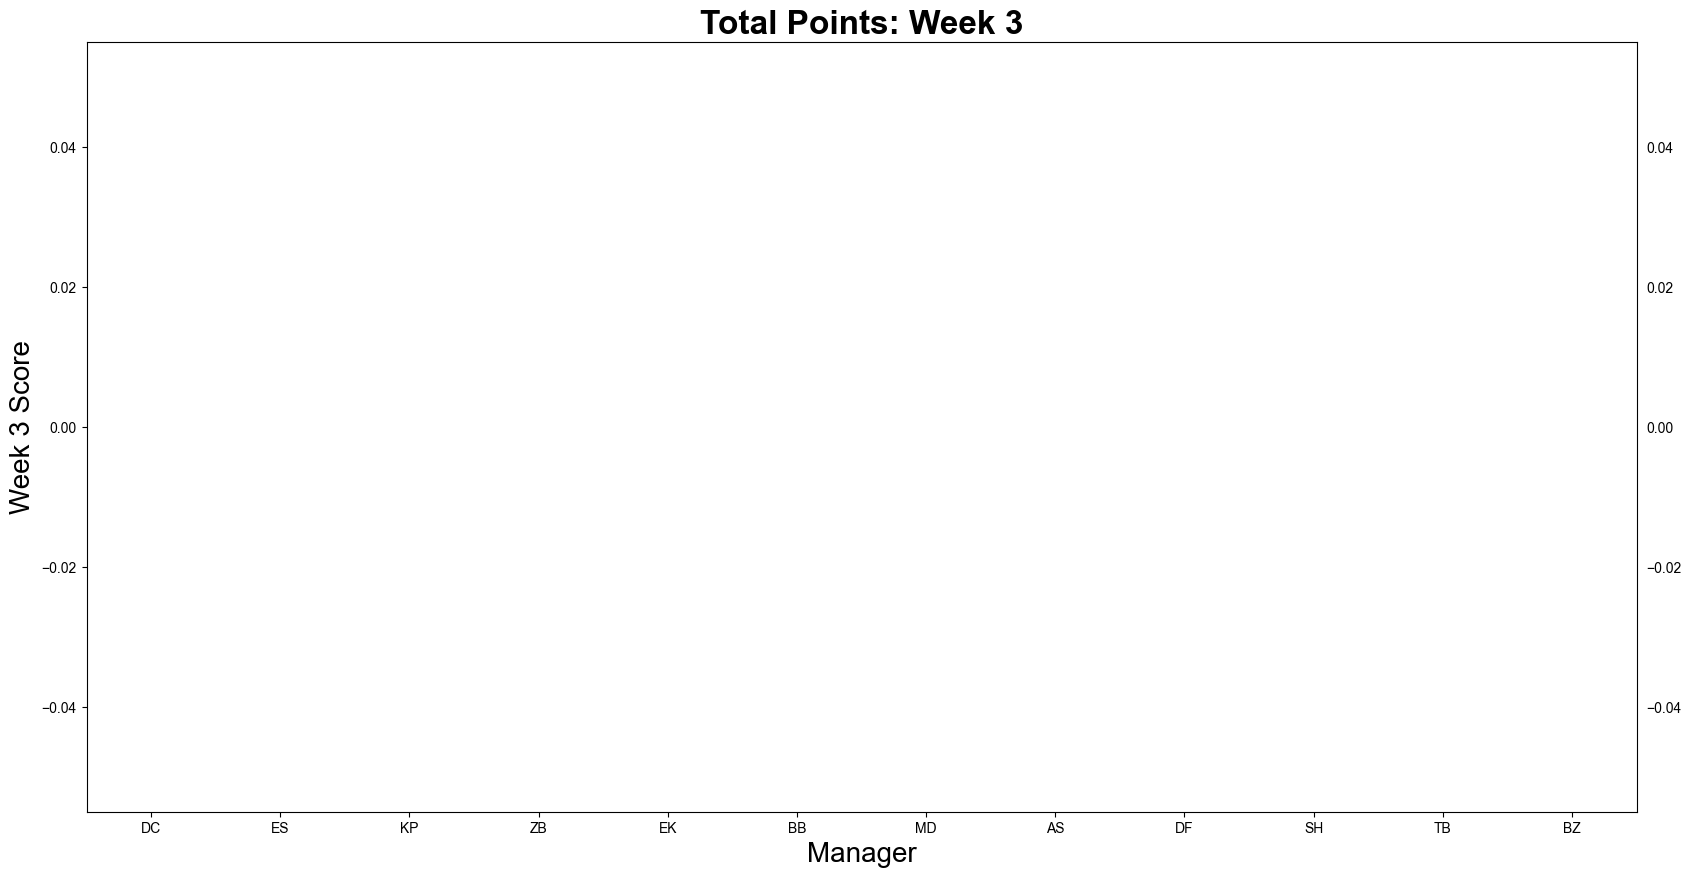

In [ ]:


fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.reset_index()
graph = sns.barplot(data=data, 
                    order=order,
                    #estimator=sum,
                    y='wk_3',
                    x='index',
                    ci=None,
                    orient='v'
                   )
ax.set_title("Total Points: Week %s" %(week),
             fontsize = 24, 
             fontweight="bold")
data = df_total_scores.T

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Week %s Score" %(week), fontsize=20)
plt.show(fig)